#### Business Case

Road safety rules and regulations are designed to prevent the citizens from fatal incidents. Although policies are in place, we observe negligent behaviour of the drivers which lead to serious injuries or death crashes. It is of utmost interest of the authorities to understand and analyse human behaviour to take necessary corrective and preventive actions.  

From the given data (i.e the vehicle details, the weather details and the vehicle travelling details) we need to predict Driving Style of the particular Driver whether it is "Agressive", "Normal" or "Vague

In ths particular problem we are intersted in finding the Aggressive Drivers as It may be benificial for stakeholders.
The stakeholders are :
1. The Citizens
2. The Road Transport authorities
3. Insurers 
4. Research/ Data Service Providers

 - The Citiens will be benefitted as it will be helpful in reducing the no. of accidents
 - The Road Tansport Authorities the maintainance cost is reduced as we can reduce the number of accidents. Moreover they get   insights to design benchmark for qualifications and driver licensing regulations, etc.
 - The Insurers will benifit in analysing underwriting risks, prevent frauds and designing No-claim-discount systems (NCD           systems),
 
It is very important for the business that there can be false positive but if we predict false negative (i.e we predict Aggressive Drivers as Non Aggressive) then it will impact the Stakeholders, thus we have to improve the Recall value

#### ML Problem Statement
From the given data (i.e the vehicle details, the weather details and the vehicle travelling details) we need to predict Driving Style of the particular Driver whether it is "Agressive", "Normal" or "Vague.
These patterns are pre identified in the datset given and one has to infer the style for new datasets by prediction.

As we have understood from the business that, the model built has to be tuned for Recall as False -ves are a strict no. Also have to provide top 10 patterns to identify Aggresive driving Style.

------------------------------------------------------------------------------------------------------------------



####  Importing Necessary libraries 

In [1]:
# Importing Necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
%matplotlib inline

#Importing lib for Modelbuilding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#### For getting the output of plot just after cell

In [2]:
init_notebook_mode(connected=True)

#### Reading the csv files

In [3]:
train_data = pd.read_csv('Train.csv')

In [4]:
train_vehicletravelling_data = pd.read_csv('Train_Vehicletravellingdata.csv')

In [5]:
train_weather_data =pd.read_csv('Train_WeatherData.csv')

#### Renaming the columns as per Attribute Description

In [6]:
train_data.columns = ['ID','Vehicle_len','Vehicle_Wt','Num_Axle','DrivingStyle']

In [7]:
train_vehicletravelling_data.columns = ['ID','date_time_trip','road_lane','vehicle_speed','pre_vehicle_ID','pre_vehicle_speed','pre_vehicle_wt','pre_vehicle_len','time_gap_pre_vehicle','road_condition']

In [8]:
train_weather_data.columns = ['ID','date_time_trip','air_temp','precipitation_type','precipitation_intensity','rel_humidity','wind_direction','wind_speed','lighting_condition']

In [9]:
print(train_data.shape)
print(train_weather_data.shape)
print(train_vehicletravelling_data.shape)

(12994, 5)
(162566, 9)
(162566, 10)


#### Merging Data
1. Merging vehicle travelling data and weather data on 'ID' and 'date and time' column
2. Merging the above data with train i.e vehicle data on 'ID' column

In [10]:
train_vehicletravelling_weather = pd.merge(train_vehicletravelling_data, train_weather_data, how='inner', on=['ID','date_time_trip'])

In [11]:
train = pd.merge(train_vehicletravelling_weather,train_data, how='outer', on=['ID'])

In [12]:
train.columns

Index(['ID', 'date_time_trip', 'road_lane', 'vehicle_speed', 'pre_vehicle_ID',
       'pre_vehicle_speed', 'pre_vehicle_wt', 'pre_vehicle_len',
       'time_gap_pre_vehicle', 'road_condition', 'air_temp',
       'precipitation_type', 'precipitation_intensity', 'rel_humidity',
       'wind_direction', 'wind_speed', 'lighting_condition', 'Vehicle_len',
       'Vehicle_Wt', 'Num_Axle', 'DrivingStyle'],
      dtype='object')

In [13]:
train.shape

(162566, 21)

In [14]:
train_driving_style = train.DrivingStyle.replace({1: 'Aggressive', 2: 'Normal', 3: 'Vague'})

### Exploratory Data Analysis

In [15]:
train.head()

ID       date_time_trip  road_lane  vehicle_speed  pre_vehicle_ID  \
0  DR_24526  2012-03-21 09:14:55          1             81           57227   
1  DR_24526  2012-03-21 09:15:07          1             88           57229   
2  DR_24526  2012-03-21 09:15:12          1             88           57230   
3  DR_24526  2012-03-21 09:15:48          2             84           57228   
4  DR_24526  2012-03-21 09:15:54          1             89           57231   

   pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  time_gap_pre_vehicle  \
0                 87           16986              941                  94.0   
1                 81            1708              551                  11.0   
2                 88           22892             1698                   4.0   
3                 89            1945              544                 127.0   
4                 88           13787             1893                  42.0   

  road_condition      ...       precipitation_type precipitation_intensity  \
0            Dry      ...                    clear                    None   
1            Dry      ...                    clear                    None   
2            Dry      ...                    clear                    None   
3            Dry      ...                    clear                    None   
4            Dry      ...                    clear                    None   

  rel_humidity  wind_direction  wind_speed  lighting_condition Vehicle_len  \
0         95.0           146.0         1.0            daylight        1265   
1         95.0           124.0         0.0            daylight        1265   
2         95.0           124.0         0.0            daylight        1265   
3         95.0           124.0         0.0            daylight        1265   
4         95.0           124.0         0.0            daylight        1265   

   Vehicle_Wt  Num_Axle  DrivingStyle  
0       10243         2             2  
1       10243         2             2  
2       10243         2             2  
3       10243         2             2  
4       10243         2             2  

[5 rows x 21 columns]

In [16]:
train.describe().transpose()

count           mean            std    min  \
road_lane             162566.0       1.500849       0.500001    1.0   
vehicle_speed         162566.0      83.455483       9.375122    8.0   
pre_vehicle_ID        162566.0  460124.263979  272271.224195   20.0   
pre_vehicle_speed     162566.0      83.458817       9.373120    0.0   
pre_vehicle_wt        162566.0    5017.562793    7399.315434    3.0   
pre_vehicle_len       162566.0     790.775285     481.944297  102.0   
time_gap_pre_vehicle  160111.0     105.340358     177.202269    1.0   
air_temp              160509.0       4.654237       3.226701  -13.0   
rel_humidity          160461.0      60.647509      18.272899   16.0   
wind_direction        160452.0     182.461178      88.927865    6.0   
wind_speed            160102.0       4.188648       3.027595    0.0   
Vehicle_len           162566.0     865.518349     495.155881  155.0   
Vehicle_Wt            162566.0    6020.270481    7972.925231   44.0   
Num_Axle              162566.0       2.846315       1.466560    2.0   
DrivingStyle          162566.0       2.147263       0.668102    1.0   

                            25%       50%        75%       max  
road_lane                  1.00       2.0       2.00       2.0  
vehicle_speed             78.00      83.0      88.00     161.0  
pre_vehicle_ID        142983.25  594321.5  692362.75  794435.0  
pre_vehicle_speed         78.00      83.0      88.00     161.0  
pre_vehicle_wt          1502.00    1862.0    2669.00   69548.0  
pre_vehicle_len          527.00     560.0     701.00    2981.0  
time_gap_pre_vehicle       7.00      43.0     125.00    1797.0  
air_temp                   2.00       5.0       7.00      24.0  
rel_humidity              46.00      58.0      76.00      97.0  
wind_direction           152.00     180.0     208.00     360.0  
wind_speed                 1.00       4.0       7.00      17.0  
Vehicle_len              550.00     577.0    1060.00    2337.0  
Vehicle_Wt              1625.00    2013.0    6220.00   57230.0  
Num_Axle                   2.00       2.0       3.00       9.0  
DrivingStyle               2.00       2.0       3.00       3.0

In [17]:
train.shape

(162566, 21)

#### Observation :
1. There are 19 identical columns and 162566 rows after merging the data
2. There ar two options either we can work with 162566 records or we can converge the data according to vehicle details table and converging the number of records to 12994

Tried both approaches attaching both files 

#### Checking for Null Values

In [18]:
train.isnull().sum()

ID                            0
date_time_trip                0
road_lane                     0
vehicle_speed                 0
pre_vehicle_ID                0
pre_vehicle_speed             0
pre_vehicle_wt                0
pre_vehicle_len               0
time_gap_pre_vehicle       2455
road_condition                0
air_temp                   2057
precipitation_type            0
precipitation_intensity       0
rel_humidity               2105
wind_direction             2114
wind_speed                 2464
lighting_condition            0
Vehicle_len                   0
Vehicle_Wt                    0
Num_Axle                      0
DrivingStyle                  0
dtype: int64

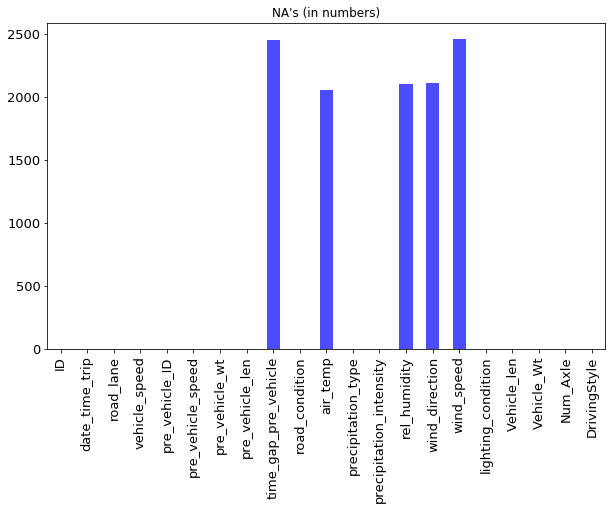

In [19]:
plt.figure(figsize=(10,10))
train.isnull().sum().plot(kind='bar',
                                  figsize=(10,6),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title("NA's (in numbers)")
plt.show()

### Correlation Between Variables

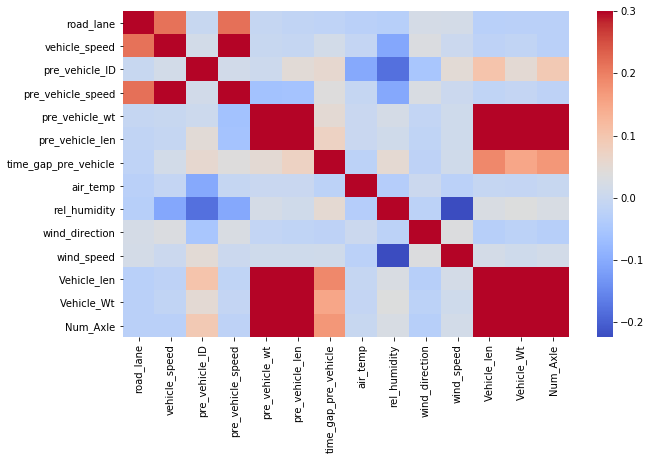

In [20]:
target = train["DrivingStyle"]
train_without_target = train.drop(["DrivingStyle"],axis=1)
corr = train_without_target.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,cmap='coolwarm',vmax=.3)

### Observation:
1. preceeding vehicle length and preceeding vehicle weight are highly correlated
2. vehicle length and vehicle weight and Number of Axles are positively correlated
3. Wind Speed and Relative Humidity Negatively Correlated
4. Road Lane and Vehicle Speed are correlated
5. Road Lane and Preceeding Vehicle speed is correlated
6. Vehicle Length and time gap between preceeding vehicle positively correlated

####  Analysing Target Varible (Driving Style)

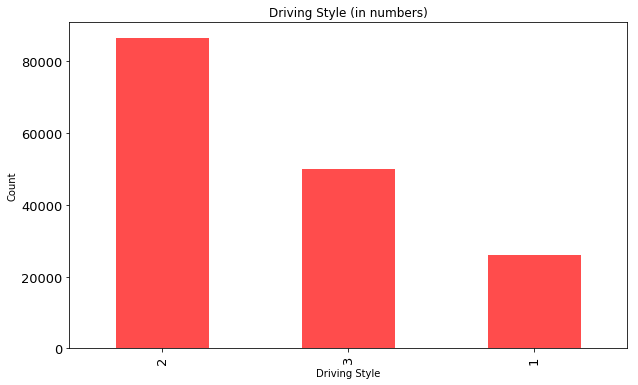

In [21]:
# plt.figure(figsize=(10,10)
train.DrivingStyle.value_counts().plot(kind='bar',
                                 figsize=(10,6),
                                  color="red",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Driving Style (in numbers)')
plt.xlabel('Driving Style')
plt.ylabel('Count')
plt.show()

#### Plotting Bar Graph For Categorical Variables

In [22]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
#         range=[0,100],
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', 
            size=14,
            color='black'
            )
        ),
        font = dict(
            family='Courier New, monospace',
            color = "white",
            size = 12
                )  
        )
    return layout_bar

In [23]:
def plot_bar(col_name):
    # create a table with value counts
    temp = train[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
            textposition = 'auto', 
        marker = dict(color = '#0047AB'),)] 
     
    layout_bar = generate_layout_bar(col_name=col_name)
    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)
    

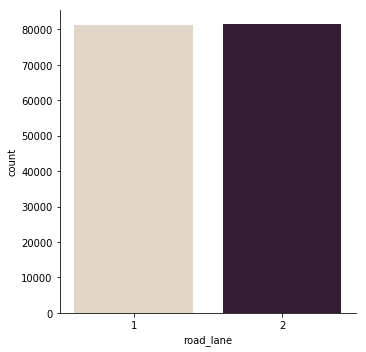

In [24]:
sns.catplot(x="road_lane", kind="count", palette="ch:.25", data=train);
    
    


#### Observation:
Two lanes on the road and the traffic is equal on both the lanes

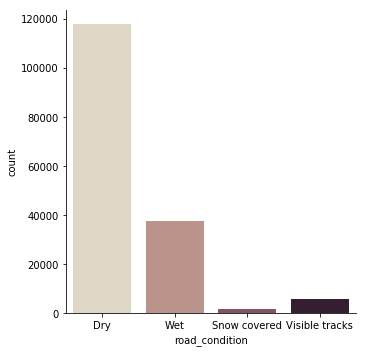

In [25]:
sns.catplot(x="road_condition", kind="count", palette="ch:.30", data=train);

#### Observation :
Road Condition has four labels Dry, Wet, Snow Covered and Visible Tracks 

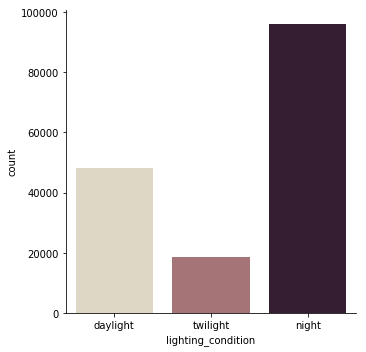

In [26]:
sns.catplot(x="lighting_condition", kind="count", palette="ch:.30", data=train);

In [27]:
plot_bar('precipitation_type')

#### Observation : 
Most of the time 93%  weather is clear according to the data


In [28]:
plot_bar('precipitation_intensity')

#### Observation :
1. There is a blank category
2. 93.24% of the precipitation_intensity column has None value as from the precipitation type cloumn we see most of the time the weather is clear 

In [29]:
#Replacing the blank category to a new Category
train.precipitation_intensity = train.precipitation_intensity.replace(to_replace=' ', value='NotKnown')

In [30]:
 plot_bar('lighting_condition')
    

### Observation :
Lighting Condition is mostly Night time i.e. the data that is collected is mostly during Night Time

In [31]:
plot_bar('Num_Axle')
   

#### Observation :
Most of the vehicles have 2 axles 

### Visualization for continuous variable 

In [32]:
def plotHistogramGraph(col_name):
    data = [go.Histogram(x=train[col_name],
       marker=dict(
        color='#CC0E1D',   
    ))]
    layout = go.Layout(title = "Histogram of {}".format(col_name))
    fig = go.Figure(data= data, layout=layout)
    iplot(fig)

In [33]:
plotHistogramGraph('vehicle_speed')

#### Observation:
Mostly vehicle speed is between 70 to 100 

In [34]:
plotHistogramGraph('wind_direction')

#### Observation:
The Wind direction is mostly between 160 to 190 degrees

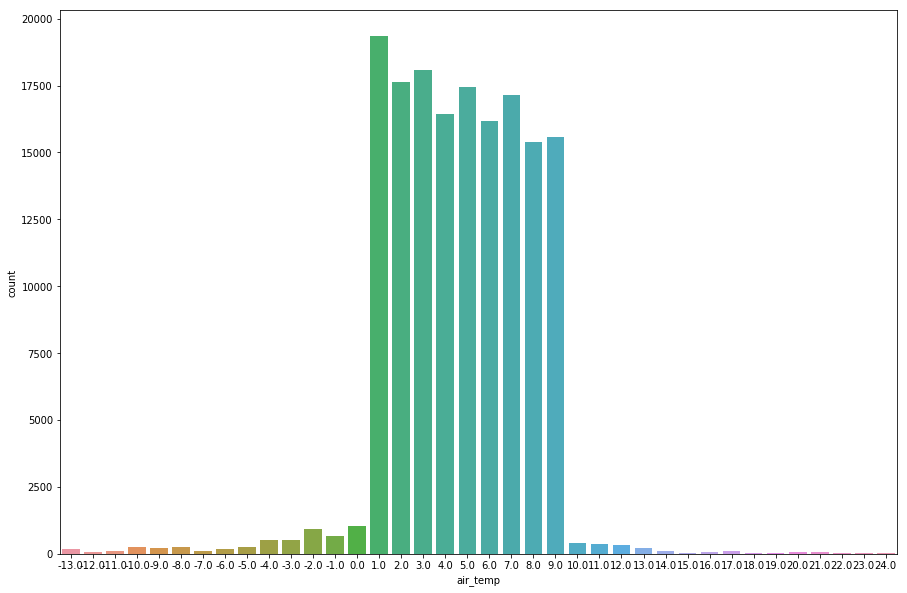

In [35]:
train.air_temp.sample(frac =0.1)
plt.figure(figsize=(15,10))
sns.countplot(x='air_temp', data=train)

#### Observation :
  The Min temp is -13 degree and Max is 24 degree. which may mean that the data set belongs to colder region

In [36]:
DrivingStyle_dict = {1:'1',
           2:'2',
           3:'3',
           }
train = train.replace({"DrivingStyle":DrivingStyle_dict })

#### Relation between vehicle speed and lighting Condition

In [37]:
driving_air_temp = train.groupby(['DrivingStyle','air_temp']).size().to_frame()
driving_air_temp = driving_air_temp.reset_index()
driving_air_temp.columns = ['DrivingStyle','air_temp','Count']


In [38]:
np.random.seed(123)
driving_air_temp.sample(frac =0.1)

DrivingStyle  air_temp  Count
8             1      -5.0     24
70            3     -11.0     37
82            3       1.0   5991
28            1      15.0     18
63            2      20.0     61
0             1     -13.0      8
5             1      -8.0     14
50            2       7.0   9361
81            3       0.0    325
4             1      -9.0     27

In [39]:
trace1 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='1'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='1'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='1'],
                textposition = 'auto',
               name = 'Aggressive')
trace2 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='2'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='2'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = driving_air_temp.air_temp[driving_air_temp.DrivingStyle=='3'],
               y = driving_air_temp.Count[driving_air_temp.DrivingStyle=='3'],
                text = driving_air_temp.Count[driving_air_temp.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Air Temperature and Driving Style',
                  xaxis =  dict(title = 'Air Temperature'),
                   yaxis =  dict(title = 'Counts',range=[0, driving_air_temp.Count+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Relation between Driving Style and Precipitation Type

In [40]:
# train.precipitation_type
driving_prec_veh = train.groupby(['DrivingStyle','precipitation_type']).size().to_frame()
driving_prec_veh = driving_prec_veh.reset_index()
driving_prec_veh.columns = ['DrivingStyle','precipitation_type','Count']


In [41]:
trace1 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='1'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='1'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='1'],
                textposition = 'auto',
               name = 'Aggressive')
trace2 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='2'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='2'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = driving_prec_veh.precipitation_type[driving_prec_veh.DrivingStyle=='3'],
               y = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                text = driving_prec_veh.Count[driving_prec_veh.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Precipitation Type',
                  xaxis =  dict(title = 'Precipitation Type'),
                   yaxis =  dict(title = 'Counts',range=[0, driving_prec_veh.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Observation:
Some people drive aggressively inspite of rain and snow

In [42]:
Driving_Road_Condition = train.groupby(['DrivingStyle','road_condition']).size().to_frame()
Driving_Road_Condition = Driving_Road_Condition.reset_index()
Driving_Road_Condition.columns = ['DrivingStyle','road_condition','Count']


In [43]:
trace1 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='1'],
           y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='1'],
            text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='2'],
               y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='2'],
                text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Road_Condition.road_condition[Driving_Road_Condition.DrivingStyle=='3'],
               y = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='3'],
                text = Driving_Road_Condition.Count[Driving_Road_Condition.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Road Condition',
                  xaxis =  dict(title = 'Road Condition'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Road_Condition.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Observation 
Most of the Drivers drive Normal way But there are few people who Inspite of Wet and Snow on the Roads Drive Aggressively

In [44]:
Driving_Lighting_Condition = train.groupby(['DrivingStyle','lighting_condition']).size().to_frame()
Driving_Lighting_Condition = Driving_Lighting_Condition.reset_index()
Driving_Lighting_Condition.columns = ['DrivingStyle','lighting_condition','Count']


In [45]:
trace1 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='1'],
           y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='1'],
            text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='2'],
               y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='2'],
                text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Lighting_Condition.lighting_condition[Driving_Lighting_Condition.DrivingStyle=='3'],
               y = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='3'],
                text = Driving_Lighting_Condition.Count[Driving_Lighting_Condition.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Lighting Condition',
                  xaxis =  dict(title = 'Lighting Condition'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Lighting_Condition.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Observation :
At Night Time Number of people driving Aggressive are more compared to other Time of the day and also 
at Night people drive more Vaguely

#### Manipulating Date Time Column

In [46]:
date =[]
time = []
for i in train.date_time_trip:
    a = str(i).split()
    date.append(str(a[0]))
    time.append(str(a[1]))
    
train['date']=date
train['time']=time

In [47]:
day = []
month = []
year = []
hour = []
for i in train.date:
    a = str(i).split('-')
    year.append(str(a[0]))
    month.append(str(a[1]))
    day.append(str(a[2]))
    
for i in train.time:
    a = str(i).split(':')
    hour.append(str(a[0]))
    
train['day'] = day
train['month'] = month
train['year'] = year
train['hour'] = hour    

In [48]:
Driving_Hour = train.groupby(['DrivingStyle','hour']).size().to_frame()
Driving_Hour = Driving_Hour.reset_index()
Driving_Hour.columns = ['DrivingStyle','Hour','Count']


In [49]:
trace1 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='1'],
           y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='1'],
            text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='1'],
            textposition = 'auto',
           name = 'Aggresive')
trace2 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='2'],
               y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='2'],
                text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='2'],
                textposition = 'auto',
               name = 'Normal')

trace3 = go.Bar(x = Driving_Hour.Hour[Driving_Hour.DrivingStyle=='3'],
               y = Driving_Hour.Count[Driving_Hour.DrivingStyle=='3'],
                text = Driving_Hour.Count[Driving_Hour.DrivingStyle=='3'],
                textposition = 'auto',
               name = 'Vague')

data = [trace1, trace2, trace3]
layout = go.Layout(width = 1000,
#                    barmode='stack',
                   height = 600,title = 'Driving Style with Hour',
                  xaxis =  dict(title = 'Hour'),
                   yaxis =  dict(title = 'Counts',range=[0, Driving_Hour.Count.max()+10]))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Observation :
There were very few people who drove between 12 pm to 6 am and comparitivele the percentage of people driving agressively was too high
Between 2pm to 12am people people drive more vaguely


In [50]:
plot_bar('month')


####   Observation :
No data for the month of June to October

#### Relationship between Preceeding Vehicle Speed and Vehicle Speed

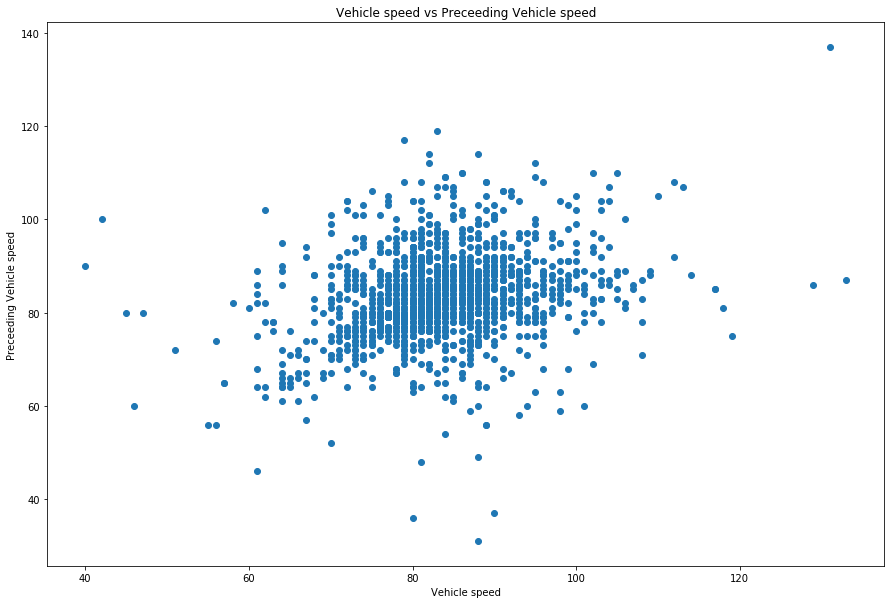

In [51]:
temp = train.sample(frac=0.01)
X = temp.vehicle_speed
Y = temp.pre_vehicle_speed
plt.figure(figsize=(15,10))
plt.xlabel("Vehicle speed")
plt.ylabel("Preceeding Vehicle speed")
plt.title("Vehicle speed vs Preceeding Vehicle speed")
plt.scatter(X,Y)
plt.show()

#### Observation : 
The speed of preceeding Vehicle and the current vehicle are almost same

#### Relation between Month and road condition

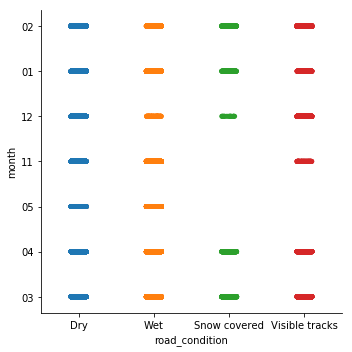

In [52]:
sns.catplot(x="road_condition", y="month",data=train,);

#### Observation :
No Snow in the month of May and November

### Trivariate Plots

#### Relation between Driving Style Road Condition and Vehicle Speed

In [53]:
# temp = train.sample(frac=0.01)
# sns.catplot(x="DrivingStyle", y="vehicle_speed",col="road_condition", aspect=.6,  kind="swarm", data=temp);

#### Observation : 
1. Most of the people drive when the road condition is Dry or Wet.
2. Few people drive aggressively inspite of Snow on th road

In [54]:
# train.Num_Axle

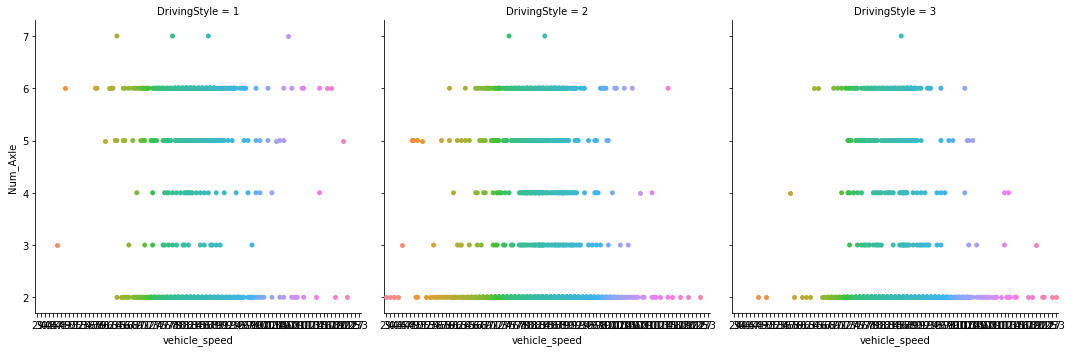

In [55]:
temp = train.sample(frac=0.02)
sns.catplot(x="vehicle_speed", y="Num_Axle",col="DrivingStyle",  kind="swarm", data=temp);

#### Observation :
1. The vehicles with 3 Axles drive less aggressively according to data given
2. There are more vehicles with 2 axles

------------------------------------------------------------------------------------------------------------------

### Feature Engineering

In [56]:
train.head()

ID       date_time_trip  road_lane  vehicle_speed  pre_vehicle_ID  \
0  DR_24526  2012-03-21 09:14:55          1             81           57227   
1  DR_24526  2012-03-21 09:15:07          1             88           57229   
2  DR_24526  2012-03-21 09:15:12          1             88           57230   
3  DR_24526  2012-03-21 09:15:48          2             84           57228   
4  DR_24526  2012-03-21 09:15:54          1             89           57231   

   pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  time_gap_pre_vehicle  \
0                 87           16986              941                  94.0   
1                 81            1708              551                  11.0   
2                 88           22892             1698                   4.0   
3                 89            1945              544                 127.0   
4                 88           13787             1893                  42.0   

  road_condition  ...   Vehicle_len Vehicle_Wt Num_Axle  DrivingStyle  \
0            Dry  ...          1265      10243        2             2   
1            Dry  ...          1265      10243        2             2   
2            Dry  ...          1265      10243        2             2   
3            Dry  ...          1265      10243        2             2   
4            Dry  ...          1265      10243        2             2   

         date      time day  month  year  hour  
0  2012-03-21  09:14:55  21     03  2012    09  
1  2012-03-21  09:15:07  21     03  2012    09  
2  2012-03-21  09:15:12  21     03  2012    09  
3  2012-03-21  09:15:48  21     03  2012    09  
4  2012-03-21  09:15:54  21     03  2012    09  

[5 rows x 27 columns]

In [57]:
train.columns

Index(['ID', 'date_time_trip', 'road_lane', 'vehicle_speed', 'pre_vehicle_ID',
       'pre_vehicle_speed', 'pre_vehicle_wt', 'pre_vehicle_len',
       'time_gap_pre_vehicle', 'road_condition', 'air_temp',
       'precipitation_type', 'precipitation_intensity', 'rel_humidity',
       'wind_direction', 'wind_speed', 'lighting_condition', 'Vehicle_len',
       'Vehicle_Wt', 'Num_Axle', 'DrivingStyle', 'date', 'time', 'day',
       'month', 'year', 'hour'],
      dtype='object')

In [58]:
train.dtypes

ID                          object
date_time_trip              object
road_lane                    int64
vehicle_speed                int64
pre_vehicle_ID               int64
pre_vehicle_speed            int64
pre_vehicle_wt               int64
pre_vehicle_len              int64
time_gap_pre_vehicle       float64
road_condition              object
air_temp                   float64
precipitation_type          object
precipitation_intensity     object
rel_humidity               float64
wind_direction             float64
wind_speed                 float64
lighting_condition          object
Vehicle_len                  int64
Vehicle_Wt                   int64
Num_Axle                     int64
DrivingStyle                object
date                        object
time                        object
day                         object
month                       object
year                        object
hour                        object
dtype: object

#### Dropping unnecessay columns

In [59]:
train = train.drop(['date_time_trip','date','time','day','year','pre_vehicle_ID','month','hour'],axis=1)

In [60]:
train.columns

Index(['ID', 'road_lane', 'vehicle_speed', 'pre_vehicle_speed',
       'pre_vehicle_wt', 'pre_vehicle_len', 'time_gap_pre_vehicle',
       'road_condition', 'air_temp', 'precipitation_type',
       'precipitation_intensity', 'rel_humidity', 'wind_direction',
       'wind_speed', 'lighting_condition', 'Vehicle_len', 'Vehicle_Wt',
       'Num_Axle', 'DrivingStyle'],
      dtype='object')

In [61]:
train.dtypes

ID                          object
road_lane                    int64
vehicle_speed                int64
pre_vehicle_speed            int64
pre_vehicle_wt               int64
pre_vehicle_len              int64
time_gap_pre_vehicle       float64
road_condition              object
air_temp                   float64
precipitation_type          object
precipitation_intensity     object
rel_humidity               float64
wind_direction             float64
wind_speed                 float64
lighting_condition          object
Vehicle_len                  int64
Vehicle_Wt                   int64
Num_Axle                     int64
DrivingStyle                object
dtype: object

#### Printing unique values for each column
If the unique value are less that 10 in a column assigning it as categorical variable else numerical variable

In [62]:
cat_cols =[]
num_cols =[]
for i in train.columns:
    if (len(np.unique(train[i])) < 10) & (i != 'month'):
        cat_cols.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(train[i])),np.unique(train[i])))
    else:
        num_cols.append(i)


road_lane : 2 : [1 2] 
road_condition : 4 : ['Dry' 'Snow covered' 'Visible tracks' 'Wet'] 
precipitation_type : 3 : ['clear' 'rain' 'snow'] 
precipitation_intensity : 5 : ['High' 'Low' 'Moderate' 'None' 'NotKnown'] 
lighting_condition : 3 : ['daylight' 'night' 'twilight'] 
Num_Axle : 8 : [2 3 4 5 6 7 8 9] 
DrivingStyle : 3 : ['1' '2' '3'] 


In [63]:
ID = 'ID'
cat_cols.append(ID)

#### Convert Categorical variables to category

In [64]:
for i in cat_cols:
    train[i] = train[i].astype('category')

In [65]:
num_cols

['ID',
 'vehicle_speed',
 'pre_vehicle_speed',
 'pre_vehicle_wt',
 'pre_vehicle_len',
 'time_gap_pre_vehicle',
 'air_temp',
 'rel_humidity',
 'wind_direction',
 'wind_speed',
 'Vehicle_len',
 'Vehicle_Wt']

#### Checking and  Imputing NA's

In [66]:
train.isna().sum()

ID                            0
road_lane                     0
vehicle_speed                 0
pre_vehicle_speed             0
pre_vehicle_wt                0
pre_vehicle_len               0
time_gap_pre_vehicle       2455
road_condition                0
air_temp                   2057
precipitation_type            0
precipitation_intensity       0
rel_humidity               2105
wind_direction             2114
wind_speed                 2464
lighting_condition            0
Vehicle_len                   0
Vehicle_Wt                    0
Num_Axle                      0
DrivingStyle                  0
dtype: int64

In [67]:
train.air_temp.fillna(train.air_temp.mean(), inplace=True)
train.wind_speed.fillna(train.wind_speed.mean(), inplace=True)
train.time_gap_pre_vehicle.fillna(train.time_gap_pre_vehicle.mean(), inplace=True)
train.wind_direction.fillna(train.wind_direction.mean(), inplace=True)
train.rel_humidity.fillna(train.rel_humidity.mean(), inplace=True)

In [68]:
np.unique(train.precipitation_intensity)

array(['High', 'Low', 'Moderate', 'None', 'NotKnown'], dtype=object)

#### Aggregating rows

In [69]:
train_data_cat_aggregated =train[cat_cols].groupby(['ID'], sort=False).max()
train_data_cat = train_data_cat_aggregated.reset_index()
train_data_cat = train_data_cat.rename(columns = {'index':'ID'})
train_data_cat.head(4)

ID  road_lane road_condition precipitation_type  \
0  DR_24526          2            Dry              clear   
1  DR_30052          2            Dry              clear   
2  DR_40928          2            Dry               rain   
3  DR_66033          2            Dry              clear   

  precipitation_intensity lighting_condition  Num_Axle DrivingStyle  
0                    None           daylight         2            2  
1                    None           daylight         6            2  
2                     Low           daylight         4            2  
3                    None           daylight         4            2

In [70]:
print(train_data_cat.shape)
train_data_cat.columns

(12994, 8)


Index(['ID', 'road_lane', 'road_condition', 'precipitation_type',
       'precipitation_intensity', 'lighting_condition', 'Num_Axle',
       'DrivingStyle'],
      dtype='object')

In [71]:
num_cols

['ID',
 'vehicle_speed',
 'pre_vehicle_speed',
 'pre_vehicle_wt',
 'pre_vehicle_len',
 'time_gap_pre_vehicle',
 'air_temp',
 'rel_humidity',
 'wind_direction',
 'wind_speed',
 'Vehicle_len',
 'Vehicle_Wt']

In [72]:
train_data_num_aggregated =train[num_cols].groupby(['ID'], sort=False).mean()
train_data_num = train_data_num_aggregated.reset_index()
train_data_num.head()
train_data_num.shape

(12994, 12)

In [73]:
print(train_data_num.shape)
train_data_num.columns

(12994, 12)


Index(['ID', 'vehicle_speed', 'pre_vehicle_speed', 'pre_vehicle_wt',
       'pre_vehicle_len', 'time_gap_pre_vehicle', 'air_temp', 'rel_humidity',
       'wind_direction', 'wind_speed', 'Vehicle_len', 'Vehicle_Wt'],
      dtype='object')

In [74]:
aggr_train_data = pd.merge(train_data_num,train_data_cat, how='outer', on=['ID'])

print(aggr_train_data.shape)
aggr_train_data.head()

(12994, 19)


ID  vehicle_speed  pre_vehicle_speed  pre_vehicle_wt  \
0  DR_24526      87.473684          87.052632     8443.789474   
1  DR_30052      82.272727          86.090909     6887.000000   
2  DR_40928      85.090909          82.454545     4624.363636   
3  DR_66033      82.818182          83.727273     9229.909091   
4  DR_45266      82.750000          82.916667     3058.416667   

   pre_vehicle_len  time_gap_pre_vehicle  air_temp  rel_humidity  \
0       965.473684             67.842105  7.000000     95.000000   
1       920.636364            138.363636  4.636364     95.545455   
2       773.909091            159.545455  1.545455     95.000000   
3      1210.545455            118.454545  3.545455     95.000000   
4       723.583333            109.500000  3.000000     95.000000   

   wind_direction  wind_speed  Vehicle_len  Vehicle_Wt  road_lane  \
0      125.157895    0.052632       1265.0     10243.0          2   
1      157.818182    6.000000       1680.0     30871.0          2   
2       64.454545    0.000000        936.0      3224.0          2   
3      169.727273    1.363636       1503.0      3315.0          2   
4      191.000000    3.000000        929.0      3022.0          2   

  road_condition precipitation_type precipitation_intensity  \
0            Dry              clear                    None   
1            Dry              clear                    None   
2            Dry               rain                     Low   
3            Dry              clear                    None   
4            Dry              clear                    None   

  lighting_condition  Num_Axle DrivingStyle  
0           daylight         2            2  
1           daylight         6            2  
2           daylight         4            2  
3           daylight         4            2  
4           daylight         4            2

In [75]:
target = aggr_train_data['DrivingStyle']
trainWithoutTarget = aggr_train_data.drop(['DrivingStyle','ID'],axis=1)

In [76]:
trainWithoutTarget.dtypes

vehicle_speed              float64
pre_vehicle_speed          float64
pre_vehicle_wt             float64
pre_vehicle_len            float64
time_gap_pre_vehicle       float64
air_temp                   float64
rel_humidity               float64
wind_direction             float64
wind_speed                 float64
Vehicle_len                float64
Vehicle_Wt                 float64
road_lane                    int64
road_condition              object
precipitation_type          object
precipitation_intensity     object
lighting_condition          object
Num_Axle                     int64
dtype: object

#### Dummifying Categorical Vriable

In [77]:
train_dummified = pd.get_dummies(trainWithoutTarget)

In [78]:
train_dummified.dtypes

vehicle_speed                       float64
pre_vehicle_speed                   float64
pre_vehicle_wt                      float64
pre_vehicle_len                     float64
time_gap_pre_vehicle                float64
air_temp                            float64
rel_humidity                        float64
wind_direction                      float64
wind_speed                          float64
Vehicle_len                         float64
Vehicle_Wt                          float64
road_lane                             int64
Num_Axle                              int64
road_condition_Dry                    uint8
road_condition_Snow covered           uint8
road_condition_Visible tracks         uint8
road_condition_Wet                    uint8
precipitation_type_clear              uint8
precipitation_type_rain               uint8
precipitation_type_snow               uint8
precipitation_intensity_High          uint8
precipitation_intensity_Low           uint8
precipitation_intensity_Moderate

### Test Data

#### Reading the test Data

In [79]:
test_data = pd.read_csv('Test.csv')

In [80]:
test_vehicletravelling_data = pd.read_csv('Test_Vehicletravellingdata.csv')

In [81]:
test_weather_data =pd.read_csv('Test_WeatherData.csv')

#### Renaming the Test data columns as per Attribute Description

In [82]:
test_data.columns = ['ID','Vehicle_len','Vehicle_Wt','Num_Axle']

In [83]:
test_vehicletravelling_data.columns = ['ID','date_time_trip','road_lane','vehicle_speed','pre_vehicle_ID','pre_vehicle_speed','pre_vehicle_wt','pre_vehicle_len','time_gap_pre_vehicle','road_condition']

In [84]:
test_weather_data.columns = ['ID','date_time_trip','air_temp','precipitation_type','precipitation_intensity','rel_humidity','wind_direction','wind_speed','lighting_condition']

#### Merging Data
1. Merging test vehicle travelling data and test weather data on 'ID' and 'date and time' column
2. Merging the above data with test data i.e test vehicle data on 'ID' column

In [85]:
test_vehicletravelling_weather = pd.merge(test_vehicletravelling_data, test_weather_data, how='inner', on=['ID','date_time_trip'])

In [86]:
test = pd.merge(test_vehicletravelling_weather,test_data, how='outer', on=['ID'])

In [87]:
test = test.drop(['date_time_trip','pre_vehicle_ID'],axis=1)

#### Manipulating Date and Time in Test data

In [88]:
# date_test =[]
# time_test = []
# for i in test.date_time_trip:
#     a = str(i).split()
#     date_test.append(str(a[0]))
#     time_test.append(str(a[1]))
# test['date']=date_test
# test['time']=time_test

In [89]:
# month_test = []
# hour_test = []
# for i in test.date:
#     a = str(i).split('-')
#     month_test.append(str(a[1]))

# for j in test.time:
#     b = str(j).split(':')
#     hour_test.append(str(b[0]))

# test['month'] = month_test
# test['hour'] = hour_test

#### Checking unique values for each column in Test Data
If the unique value are less that 10 in a column assigning it as categorical variable else numerical variable

In [90]:
cat_cols_test =[]
num_cols_test =[]
for i in test.columns:
    if (len(np.unique(test[i])) < 10) :
        cat_cols_test.append(i)
        print("{} : {} : {} ".format(i,len(np.unique(test[i])),np.unique(test[i])))
    else:
        num_cols_test.append(i)
        
ID = 'ID'
cat_cols_test.append(ID)

road_lane : 2 : [1 2] 
road_condition : 4 : ['Dry' 'Snow covered' 'Visible tracks' 'Wet'] 
precipitation_type : 3 : ['clear' 'rain' 'snow'] 
precipitation_intensity : 5 : [' ' 'High' 'Low' 'Moderate' 'None'] 
lighting_condition : 3 : ['daylight' 'night' 'twilight'] 
Num_Axle : 7 : [2 3 4 5 6 7 9] 


#### Convert Categorical variables to category in Test Data

In [91]:
for i in cat_cols_test:
    test[i] = test[i].astype('category')
    

In [92]:
test.dtypes

ID                         category
road_lane                  category
vehicle_speed                 int64
pre_vehicle_speed             int64
pre_vehicle_wt                int64
pre_vehicle_len               int64
time_gap_pre_vehicle        float64
road_condition             category
air_temp                    float64
precipitation_type         category
precipitation_intensity    category
rel_humidity                float64
wind_direction              float64
wind_speed                  float64
lighting_condition         category
Vehicle_len                   int64
Vehicle_Wt                    int64
Num_Axle                   category
dtype: object

In [93]:
# test[datetimecols] = test[datetimecols].apply(pd.to_numeric)
# test.dtypes

In [94]:
num_cols_test

['ID',
 'vehicle_speed',
 'pre_vehicle_speed',
 'pre_vehicle_wt',
 'pre_vehicle_len',
 'time_gap_pre_vehicle',
 'air_temp',
 'rel_humidity',
 'wind_direction',
 'wind_speed',
 'Vehicle_len',
 'Vehicle_Wt']

#### Checking and  Imputing NA's on Test Data

In [95]:
test.isna().sum()

ID                           0
road_lane                    0
vehicle_speed                0
pre_vehicle_speed            0
pre_vehicle_wt               0
pre_vehicle_len              0
time_gap_pre_vehicle       956
road_condition               0
air_temp                   934
precipitation_type           0
precipitation_intensity      0
rel_humidity               943
wind_direction             964
wind_speed                 983
lighting_condition           0
Vehicle_len                  0
Vehicle_Wt                   0
Num_Axle                     0
dtype: int64

In [96]:
test.time_gap_pre_vehicle.fillna(test.time_gap_pre_vehicle.mean(), inplace=True)
test.air_temp.fillna(test.air_temp.mean(), inplace=True)
test.rel_humidity.fillna(test.rel_humidity.mean(), inplace=True)
test.wind_direction.fillna(test.wind_direction.mean(), inplace=True)
test.wind_speed.fillna(test.wind_speed.mean(), inplace=True)

In [97]:
np.unique(test.precipitation_intensity)

array([' ', 'High', 'Low', 'Moderate', 'None'], dtype=object)

In [98]:
test.precipitation_intensity = test.precipitation_intensity.replace(to_replace=' ', value='NotKnown').astype('category')

#### Aggregating test data

In [99]:
test_data_cat_aggregated =test[cat_cols_test].groupby(['ID'], sort=False).max()
test_data_cat = test_data_cat_aggregated.reset_index()
test_data_cat = test_data_cat.rename(columns = {'index':'ID'})
test_data_cat.head(4)

ID  road_lane road_condition precipitation_type  \
0  DR_79986          2            Wet              clear   
1  DR_82800          2            Wet              clear   
2  DR_93526          2            Wet              clear   
3  DR_94423          2            Wet              clear   

  precipitation_intensity lighting_condition  Num_Axle  
0                    None           daylight         2  
1                    None           daylight         2  
2                    None           daylight         5  
3                    None           daylight         2

In [100]:
test_data_cat.dtypes

ID                         category
road_lane                     int64
road_condition               object
precipitation_type           object
precipitation_intensity      object
lighting_condition           object
Num_Axle                      int64
dtype: object

In [101]:
test_data_num_aggregated =test[num_cols_test].groupby(['ID'], sort=False).mean()
test_data_num = test_data_num_aggregated.reset_index()

print(test_data_num.shape)
test_data_num.head()

(4880, 12)


ID  vehicle_speed  pre_vehicle_speed  pre_vehicle_wt  \
0  DR_79986      88.000000          88.230769     5974.846154   
1  DR_82800      82.625000          83.500000     4366.750000   
2  DR_93526      84.000000          83.571429    11414.214286   
3  DR_94423      84.333333          84.333333     9380.916667   
4  DR_93909      87.357143          88.785714    10362.357143   

   pre_vehicle_len  time_gap_pre_vehicle  air_temp  rel_humidity  \
0       999.153846             85.846154  6.615385          95.0   
1       724.875000            124.625000  4.000000          95.0   
2      1025.214286            107.500000  3.000000          95.0   
3      1034.083333            106.583333  8.500000          94.0   
4       957.357143             81.857143  2.000000          93.0   

   wind_direction  wind_speed  Vehicle_len  Vehicle_Wt  
0      179.538462    6.307692        574.0      1268.0  
1      230.250000    4.000000        530.0      2379.0  
2      231.000000    4.000000       1687.0     17648.0  
3      193.833333    5.083333       1353.0     13525.0  
4       79.000000    6.000000        597.0      2280.0

In [102]:
test_data_num.columns

Index(['ID', 'vehicle_speed', 'pre_vehicle_speed', 'pre_vehicle_wt',
       'pre_vehicle_len', 'time_gap_pre_vehicle', 'air_temp', 'rel_humidity',
       'wind_direction', 'wind_speed', 'Vehicle_len', 'Vehicle_Wt'],
      dtype='object')

In [103]:
test_data_final = pd.merge(test_data_num,test_data_cat ,on=['ID'],how='outer')
test_data_final = test_data_final.drop(['ID'],axis=1)

In [104]:
# test_data_ID.dtypes

#### Dummifying Categorical Vriable

In [105]:
test_dummified = pd.get_dummies(test_data_final)

In [106]:
train_dummified.dtypes

vehicle_speed                       float64
pre_vehicle_speed                   float64
pre_vehicle_wt                      float64
pre_vehicle_len                     float64
time_gap_pre_vehicle                float64
air_temp                            float64
rel_humidity                        float64
wind_direction                      float64
wind_speed                          float64
Vehicle_len                         float64
Vehicle_Wt                          float64
road_lane                             int64
Num_Axle                              int64
road_condition_Dry                    uint8
road_condition_Snow covered           uint8
road_condition_Visible tracks         uint8
road_condition_Wet                    uint8
precipitation_type_clear              uint8
precipitation_type_rain               uint8
precipitation_type_snow               uint8
precipitation_intensity_High          uint8
precipitation_intensity_Low           uint8
precipitation_intensity_Moderate

In [107]:
test_dummified.dtypes

vehicle_speed                       float64
pre_vehicle_speed                   float64
pre_vehicle_wt                      float64
pre_vehicle_len                     float64
time_gap_pre_vehicle                float64
air_temp                            float64
rel_humidity                        float64
wind_direction                      float64
wind_speed                          float64
Vehicle_len                         float64
Vehicle_Wt                          float64
road_lane                             int64
Num_Axle                              int64
road_condition_Dry                    uint8
road_condition_Snow covered           uint8
road_condition_Visible tracks         uint8
road_condition_Wet                    uint8
precipitation_type_clear              uint8
precipitation_type_rain               uint8
precipitation_type_snow               uint8
precipitation_intensity_High          uint8
precipitation_intensity_Low           uint8
precipitation_intensity_Moderate

In [108]:
test_dummified.shape

(4880, 28)

In [109]:
train_dummified.shape

(12994, 28)

#### Train dummified has an extra column Num_Axle_8 So adding the same in Test Data

In [110]:
# test_dummified['Num_Axle_8'] = 0

In [111]:
test_dummified.head(4)

vehicle_speed  pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  \
0      88.000000          88.230769     5974.846154       999.153846   
1      82.625000          83.500000     4366.750000       724.875000   
2      84.000000          83.571429    11414.214286      1025.214286   
3      84.333333          84.333333     9380.916667      1034.083333   

   time_gap_pre_vehicle  air_temp  rel_humidity  wind_direction  wind_speed  \
0             85.846154  6.615385          95.0      179.538462    6.307692   
1            124.625000  4.000000          95.0      230.250000    4.000000   
2            107.500000  3.000000          95.0      231.000000    4.000000   
3            106.583333  8.500000          94.0      193.833333    5.083333   

   Vehicle_len             ...               precipitation_type_rain  \
0        574.0             ...                                     0   
1        530.0             ...                                     0   
2       1687.0             ...                                     0   
3       1353.0             ...                                     0   

   precipitation_type_snow  precipitation_intensity_High  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   

   precipitation_intensity_Low  precipitation_intensity_Moderate  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   

   precipitation_intensity_None  precipitation_intensity_NotKnown  \
0                             1                                 0   
1                             1                                 0   
2                             1                                 0   
3                             1                                 0   

   lighting_condition_daylight  lighting_condition_night  \
0                            1                         0   
1                            1                         0   
2                            1                         0   
3                            1                         0   

   lighting_condition_twilight  
0                            0  
1                            0  
2                            0  
3                            0  

[4 rows x 28 columns]

In [112]:
test.isna().sum()

ID                         0
road_lane                  0
vehicle_speed              0
pre_vehicle_speed          0
pre_vehicle_wt             0
pre_vehicle_len            0
time_gap_pre_vehicle       0
road_condition             0
air_temp                   0
precipitation_type         0
precipitation_intensity    0
rel_humidity               0
wind_direction             0
wind_speed                 0
lighting_condition         0
Vehicle_len                0
Vehicle_Wt                 0
Num_Axle                   0
dtype: int64

#### All reprocessing over

#### Train Test Split

In [113]:
train_dummified.head()

vehicle_speed  pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  \
0      87.473684          87.052632     8443.789474       965.473684   
1      82.272727          86.090909     6887.000000       920.636364   
2      85.090909          82.454545     4624.363636       773.909091   
3      82.818182          83.727273     9229.909091      1210.545455   
4      82.750000          82.916667     3058.416667       723.583333   

   time_gap_pre_vehicle  air_temp  rel_humidity  wind_direction  wind_speed  \
0             67.842105  7.000000     95.000000      125.157895    0.052632   
1            138.363636  4.636364     95.545455      157.818182    6.000000   
2            159.545455  1.545455     95.000000       64.454545    0.000000   
3            118.454545  3.545455     95.000000      169.727273    1.363636   
4            109.500000  3.000000     95.000000      191.000000    3.000000   

   Vehicle_len             ...               precipitation_type_rain  \
0       1265.0             ...                                     0   
1       1680.0             ...                                     0   
2        936.0             ...                                     1   
3       1503.0             ...                                     0   
4        929.0             ...                                     0   

   precipitation_type_snow  precipitation_intensity_High  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   precipitation_intensity_Low  precipitation_intensity_Moderate  \
0                            0                                 0   
1                            0                                 0   
2                            1                                 0   
3                            0                                 0   
4                            0                                 0   

   precipitation_intensity_None  precipitation_intensity_NotKnown  \
0                             1                                 0   
1                             1                                 0   
2                             0                                 0   
3                             1                                 0   
4                             1                                 0   

   lighting_condition_daylight  lighting_condition_night  \
0                            1                         0   
1                            1                         0   
2                            1                         0   
3                            1                         0   
4                            1                         0   

   lighting_condition_twilight  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 28 columns]

In [114]:
import random

random.seed(1234) 
x_train, x_val, y_train, y_val = train_test_split(train_dummified, target, stratify=target, test_size=0.25)

In [115]:
x_train.head()

vehicle_speed  pre_vehicle_speed  pre_vehicle_wt  pre_vehicle_len  \
9267       86.444444          85.222222     6972.555556       917.000000   
501        85.250000          84.875000     3821.375000       711.125000   
10394      84.000000          83.571429     2019.500000       607.785714   
1483       81.903226          81.903226     4913.741935       685.161290   
667        65.037037          63.629630     3312.259259       687.703704   

       time_gap_pre_vehicle  air_temp  rel_humidity  wind_direction  \
9267             107.666667  5.000000     61.000000      167.444444   
501              182.875000  3.750000     78.000000       36.750000   
10394            103.357143  4.714286     37.000000      166.142857   
1483              42.548387  5.967742     38.935484       43.903226   
667               46.518519  1.000000     89.000000       56.000000   

       wind_speed  Vehicle_len             ...               \
9267     1.888889        579.0             ...                
501      2.000000        604.0             ...                
10394    6.857143        555.0             ...                
1483     3.548387        528.0             ...                
667      5.000000        590.0             ...                

       precipitation_type_rain  precipitation_type_snow  \
9267                         0                        0   
501                          0                        0   
10394                        0                        0   
1483                         0                        0   
667                          0                        0   

       precipitation_intensity_High  precipitation_intensity_Low  \
9267                              0                            0   
501                               0                            0   
10394                             0                            0   
1483                              0                            0   
667                               0                            0   

       precipitation_intensity_Moderate  precipitation_intensity_None  \
9267                                  0                             1   
501                                   0                             1   
10394                                 0                             1   
1483                                  0                             1   
667                                   0                             1   

       precipitation_intensity_NotKnown  lighting_condition_daylight  \
9267                                  0                            0   
501                                   0                            0   
10394                                 0                            1   
1483                                  0                            0   
667                                   0                            0   

       lighting_condition_night  lighting_condition_twilight  
9267                          0                            1  
501                           0                            1  
10394                         0                            0  
1483                          0                            1  
667                           1                            0  

[5 rows x 28 columns]

### MODEL BUILDING

#### Logistic Regression

In [116]:
logistic_model = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial')
logistic_model.fit(x_train, y_train)
# logistic_model.

C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
predictions_log_model_train = logistic_model.predict(x_train)
predictions_log_model_val = logistic_model.predict(x_val)

print(recall_score(y_train,predictions_log_model_train,labels=[1],average='macro'))
print(recall_score(y_val,predictions_log_model_val,labels=[1],average='macro'))

0.3757808745795291
0.3578643578643579


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [118]:
#### Decision Tree

In [119]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[7],'min_samples_split' : [10],'criterion':['gini']}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4,cv=5)
clf.fit(X=x_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7192406362237045 {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}


In [120]:
predictions_tree_model_train = tree_model.predict(x_train)
predictions_tree_model_val = tree_model.predict(x_val)

print(recall_score(y_train,predictions_tree_model_train,labels=[1],average='macro'))
print(recall_score(y_val,predictions_tree_model_val,labels=[1],average='macro'))

0.6458433445458914
0.5526695526695526


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



#### Random Forest

In [121]:
rf = RandomForestClassifier(n_estimators = 1500, n_jobs=-1,random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [122]:
predictions_rf_train = rf.predict(x_train)
predictions_rf_val = rf.predict(x_val)

print(recall_score(y_train,predictions_rf_train,labels=[1],average='macro'))
print(recall_score(y_val,predictions_rf_val,labels=[1],average='macro'))

1.0
0.5108225108225108


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [123]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [124]:
rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42)


In [125]:
rf_random.fit(x_train, y_train)
best_rf1= rf_random.best_estimator_
best_rf_features = rf_random.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   3.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   3.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   3.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


In [126]:
predictions_bestrf_train1 = best_rf1.predict(x_train)
predictions_bestrf_val1 = best_rf1.predict(x_val)

print(recall_score(y_train,predictions_bestrf_train1,labels=[1],average='macro'))
print(recall_score(y_val,predictions_bestrf_val1,labels=[1],average='macro'))

0.8077847188851514
0.5108225108225108


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [127]:
predictions_bestrf_tst = best_rf1.predict(test_dummified)


In [128]:
test_data_ID = test_data_num.ID

In [129]:
rf_grid2= pd.DataFrame({'ID':test_data_ID})
rf_grid2['DrivingStyle'] = predictions_bestrf_tst


In [130]:
#pd.DataFrame(rf_grid3).to_csv("anita_rf_grid12.csv")

#### Gradient Boosting


In [131]:
learning_rates = [0.05, 0.1, 0.25, 0.5]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=125, learning_rate = learning_rate,min_samples_split=4, max_features=None, max_depth = 3, random_state = 20)
    gb.fit(x_train, y_train)
    predictions_gb_train = gb.predict(x_train)
    predictions_gb_val = gb.predict(x_val)

    print(recall_score(y_train,predictions_gb_train,labels=[1],average='macro'))
    print(recall_score(y_val,predictions_gb_val,labels=[1],average='macro'))

C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



0.565112926477655
0.49927849927849927


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



0.5920230658337338
0.4963924963924964


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



0.6665064872657376
0.4805194805194805
0.7611725132148006
0.4574314574314574


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [132]:
xgb_model = GradientBoostingClassifier(n_estimators=125, learning_rate = 0.1,min_samples_split=4, max_features=None, max_depth = 3, random_state = 20)
kfold = StratifiedKFold(n_splits=5, random_state=7)
results = cross_val_score(xgb_model, x_train, y_train, cv=kfold)


In [133]:
predictions_gb_train = gb.predict(x_train)
predictions_gb_val = gb.predict(x_val)

print(recall_score(y_train,predictions_gb_train,labels=[1],average='macro'))
print(recall_score(y_val,predictions_gb_val,labels=[1],average='macro'))

0.7611725132148006
0.4574314574314574


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [134]:
#### XGB

In [135]:
xgbm = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
pr_train = xgbm.predict(x_train)
pr_val = xgbm.predict(x_val)

print(recall_score(y_train,pr_train,labels=[1],average='macro'))
print(recall_score(y_val,pr_val,labels=[1],average='macro'))

0.5780874579529073
0.49783549783549785


#### Use of corss validation
Used in all the above model but it was not useful in increasing the recall rate

#### MLP Classifier

In [136]:
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, early_stopping=False, epsilon=1e-08,
           hidden_layer_sizes=(100,), learning_rate='constant',
           learning_rate_init=0.001, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, power_t=0.5, random_state=50,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
           verbose=False, warm_start=True)
mlp.fit(x_train, y_train)
mlp_pred_train = mlp.predict(x_train)
rec_score_train = recall_score(y_train,mlp_pred_train,labels=[1],average='macro')
mlp_pred_val = mlp.predict(x_val)
rec_score_test = recall_score(y_val, mlp_pred_val, labels=[1],average='macro')
print(rec_score_train)
print(rec_score_test)

0.3493512734262374
0.29148629148629146


C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\ce700\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [137]:

# mlp = MLPClassifier(random_state=12)
# mlp.fit(x_train, y_train)
# mlp_pred_train = mlp.predict(x_train)
# rec_score_train = recall_score(y_train,mlp_pred_train,labels=[1],average='macro')
# print(434)
# print(rec_score_train)
# mlp_pred_val = mlp.predict(x_val)
# rec_score_test = recall_score(y_val, mlp_pred_val, labels=[1],average='macro')
# print(rec_score_test)

#### Building Tree Framework

In [138]:
def tree_to_pseudo(tree, feature_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [139]:
tree_to_pseudo(tree_model,train_dummified.columns)

 if ( lighting_condition_daylight <= 0.5 ) {
   if ( vehicle_speed <= 81.25595092773438 ) {
     if ( Vehicle_len <= 1695.5 ) {
       if ( road_condition_Wet <= 0.5 ) {
         if ( road_condition_Snow covered <= 0.5 ) {
           if ( rel_humidity <= 29.33088207244873 ) {
             if ( air_temp <= 7.25 ) {
               return [[1. 6. 0.]]
             } else {
               return [[3. 0. 0.]]
             }
           } else {
             if ( pre_vehicle_len <= 1700.25 ) {
               return [[ 66. 731.  14.]]
             } else {
               return [[2. 2. 0.]]
             }
           }
         } else {
           if ( wind_direction <= 191.25 ) {
             if ( pre_vehicle_speed <= 71.36813354492188 ) {
               return [[ 8. 40.  6.]]
             } else {
               return [[10. 16.  6.]]
             }
           } else {
             if ( pre_vehicle_speed <= 75.41666793823242 ) {
               return [[13.  5.  3.]]
             } else {
    

#### Observation:  
1. 
 - lighting_condition_daylight <= 0.5  
 - vehicle_speed <= 81.25657653808594)
 - Vehicle_len <= 1694.5 )
 - road_condition_Dry <= 0.5 )
 - road_condition_Visible tracks <= 0.5 )
 - Vehicle_Wt <= 8244.0
 - vehicle_speed > 81.22335815429688 

2.  
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len <= 1694.5
 - road_condition_Dry <= 0.5
 - road_condition_Visible tracks <= 0.5
 - Vehicle_Wt > 8244.0
 - wind_direction <= 175.16665649414062

3. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len <= 1694.5
 - road_condition_Dry > 0.5
 - pre_vehicle_speed <= 100.75
 - rel_humidity <= 29.330883026123047
 - rel_humidity <= 28.761905670166016

4. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len <= 1694.5
 - road_condition_Dry > 0.5
 - pre_vehicle_speed > 100.75

5. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len > 1694.5
 - wind_direction <= 192.5454559326172
 - vehicle_speed <= 74.92308044433594
 - rel_humidity <= 88.97058868408203
 - time_gap_pre_vehicle > 56.287879943847656

6. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len > 1694.5
 - wind_direction <= 192.5454559326172
 - vehicle_speed <= 74.92308044433594
 - rel_humidity > 88.97058868408203
 - wind_speed > 3.8333334922790527

7. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len > 1694.5
 - wind_direction <= 192.5454559326172
 - vehicle_speed > 74.92308044433594
 - Vehicle_len <= 2064.5
 - pre_vehicle_len <= 1021.737060546875

8. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len > 1694.5
 - wind_direction <= 192.5454559326172
 - vehicle_speed > 74.92308044433594
 - Vehicle_len > 2064.5 ) then the Driving style is Aggressive

9. 
 - lighting_condition_daylight <= 0.5
 - vehicle_speed <= 81.25657653808594 
 - Vehicle_len > 1694.5 
 - wind_direction > 192.5454559326172
 - road_condition_Wet <= 0.5 
 - air_temp <= 7.845238208770752 
 - road_lane = 2 

10. 
 - lighting_condition_daylight <= 0.5 
 - vehicle_speed <= 81.25657653808594
 - Vehicle_len > 1694.5
 - wind_direction > 192.5454559326172 
 - road_condition_Wet <= 0.5
 - Vehicle_Wt <= 5723.0
 - Vehicle_len <= 1711.5

In [140]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Users/ADMIN/Anaconda3/Library/bin/graphviz'

In [141]:
train_dummified.columns

Index(['vehicle_speed', 'pre_vehicle_speed', 'pre_vehicle_wt',
       'pre_vehicle_len', 'time_gap_pre_vehicle', 'air_temp', 'rel_humidity',
       'wind_direction', 'wind_speed', 'Vehicle_len', 'Vehicle_Wt',
       'road_lane', 'Num_Axle', 'road_condition_Dry',
       'road_condition_Snow covered', 'road_condition_Visible tracks',
       'road_condition_Wet', 'precipitation_type_clear',
       'precipitation_type_rain', 'precipitation_type_snow',
       'precipitation_intensity_High', 'precipitation_intensity_Low',
       'precipitation_intensity_Moderate', 'precipitation_intensity_None',
       'precipitation_intensity_NotKnown', 'lighting_condition_daylight',
       'lighting_condition_night', 'lighting_condition_twilight'],
      dtype='object')

In [142]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data, filled=True, rounded=True, special_characters=True,class_names=['Aggressive', 'Normal', 'Vague'],rotate=False,feature_names=train_dummified.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

#### Summary and Conclusion
Neural Network model performed better with 96% recall on test data
Decision tree gave 70 % Recall on test data 
Random forest gave 80 % on train and validation data but gave 53% on test data 